In [8]:
%pylab inline
import pysd
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [72]:
model = pysd.read_vensim('bass_diffusion.mdl')
model.doc()

total_potential = model.components.potential_adopters_p()

### Timeseries behavior

We expect the model to exhibit S-shaped growth whenever the word of mouth loop is active.

If the initial `adopter` population is large, the S-shaped growth may initialize in the second half of the curve, and look just like exponential growth to the asymtote

When WOM is not active, but advertising is, we expect exponential growth to an asymtote.

### Phase plane

With no advertising, when the fraction having adopted is zero or one, we expect the adoption rate to be zero. We expect it to be greatest when the number of interactions between adopters and non-adopters is greatest, the product of the two values. This will create an inverted parabola.

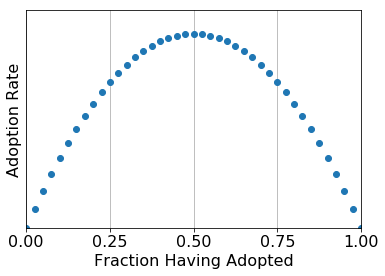

In [73]:
model.set_components({'Advertising Effectiveness a':0})

collector = []
for f_adopt in np.arange(0,1.01,.025):
    model.set_initial_condition((0, {'Adopters A': f_adopt*total_potential, 
                                     'Potential Adopters P': (1-f_adopt)*total_potential}))
    collector.append({'Fraction Having Adopted': f_adopt, 'Adoption Rate': model.components.adoption_rate_ar()})
    
result = pd.DataFrame(collector)
result.set_index('Fraction Having Adopted', inplace=True)
result.plot(fontsize=16, legend=False, linewidth=0, marker='o')
plt.yticks([])
plt.xticks([0, .25, .5, .75, 1])
plt.xlabel('Fraction Having Adopted', fontsize=16)
plt.ylabel('Adoption Rate', fontsize=16)
plt.grid('on')
plt.ylim(0, 35)
plt.savefig('Phase_Plane_noad.png')

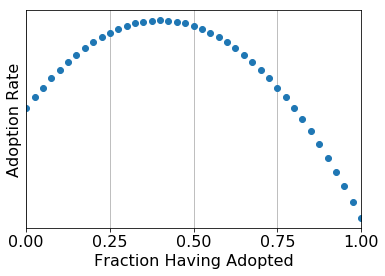

In [77]:
model.set_components({'Advertising Effectiveness a':0.05})

collector = []
for f_adopt in np.arange(0,1.01,.025):
    model.set_initial_condition((0, {'Adopters A': f_adopt*total_potential, 
                                     'Potential Adopters P': (1-f_adopt)*total_potential}))
    collector.append({'Fraction Having Adopted': f_adopt, 'Adoption Rate': model.components.adoption_rate_ar()})
    
result = pd.DataFrame(collector)
result.set_index('Fraction Having Adopted', inplace=True)
result.plot(fontsize=16, legend=False, linewidth=0, marker='o')
plt.yticks([])
plt.xticks([0, .25, .5, .75, 1])
plt.xlabel('Fraction Having Adopted', fontsize=16)
plt.ylabel('Adoption Rate', fontsize=16)
plt.grid('on')
#plt.ylim(0, 35)
plt.savefig('Phase_Plane_noad.png')